https://mft.rrc.texas.gov/link/4e9023eb-e4ee-45b8-81b7-aec1494c1e8e

http://www.rrc.texas.gov/media/kmld3uzj/digital-map-information-user-guide-2021.pdf

https://www.rrc.state.tx.us/oil-and-gas/compliance-enforcement/hb-2259-hb-3134-inactive-well-requirements/cost-calculation/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
orphans = pd.read_csv(r'E_WEB LIST OF ORPHANS _12 DELIN 03.31.2020.csv')
data = gpd.read_file(r'atascosa\well013b.shp')
basemap = gpd.read_file(r'Basemap013\road013l.shp')

In [3]:
orphans.head()

DISTRICT_NAME COUNTY_NAME                        FIELD_NAME  \
0            01    ATASCOSA                  ANCHORAGE, SOUTH   
1            01    MCMULLEN         CALLIHAM, SOUTH (JACKSON)   
2            09      ARCHER             ARCHER COUNTY REGULAR   
3            01    MCMULLEN            CALLIHAM, SOUTH (1100)   
4            01    MCMULLEN  CAMPANA, SOUTH(GOVT. WELLS 2600)   

                 OPERATOR_NAME  OPERATOR_NO          LEASE_NAME OG_CODE  \
0                HAILEY, E. M.       342800      FOWLER, SAN J.       G   
1   TROTTER-HOWLING & HATTAWAY       871290      CLAUNCH, B. C.       G   
2  PRICE, W. W. LUMBER COMPANY       676940  ANDREWS, M. P. -B-       O   
3                ELBO CO., THE       246610     WHITMIRE, W. A.       G   
4       G. & M. ENERGY COMPANY       292290          HARRIS, L.       G   

   LEASE_ID WELL_NO       API  WB_Months_Inactive  
0         2       1   1300361                 279  
1        87       3  31100693                 279  
2         9       1    980018                 279  
3        91       1  31100692                 279  
4        99       1  31102162                 279

In [4]:
data.head()

BOTTOM_ID  SURFACE_ID  SYMNUM        APINUM RELIAB       API10       API  \
0     133795      133795       7    4201302643     15    01302643  01302643   
1    1297488     1297488       2  4201335124H1     40  01335124H1  01335124   
2    1266458     1266458       2  4201334682H1     40  01334682H1  01334682   
3    1304818     1304818       2  4201335226H1     40  01335226H1  01335226   
4    1370078     1370078       2  4201335685H1     55  01335685H1  01335685   

      LONG27      LAT27     LONG83      LAT83 OUT_FIPS CWELLNUM RADIOACT  \
0 -98.770887  28.883909 -98.771216  28.884159        N       18     None   
1 -98.796940  28.703738 -98.797270  28.703993        N      21H     None   
2 -98.800584  28.701451 -98.800914  28.701706        N     101H     None   
3 -98.796331  28.704167 -98.796661  28.704423        N      22H     None   
4 -98.205042  28.740594 -98.205328  28.740855        N       2H        N   

  WELLID STCODE                                      geometry  
0  02643   None   POINT (-98.77088688918505 28.8839093296753)  
1  35124     H1  POINT (-98.79694001950168 28.70373811857703)  
2  34682     H1  POINT (-98.80058411137468 28.70145093962095)  
3  35226     H1  POINT (-98.79633119297871 28.70416747263031)  
4  35685     H1  POINT (-98.20504166734534 28.74059444441422)

In [5]:
orphans.query('API ==  1300361')

DISTRICT_NAME COUNTY_NAME        FIELD_NAME  OPERATOR_NAME  OPERATOR_NO  \
0            01    ATASCOSA  ANCHORAGE, SOUTH  HAILEY, E. M.       342800   

       LEASE_NAME OG_CODE  LEASE_ID WELL_NO      API  WB_Months_Inactive  
0  FOWLER, SAN J.       G         2       1  1300361                 279

In [6]:
data.query('API == "01300361"')

BOTTOM_ID  SURFACE_ID  SYMNUM      APINUM RELIAB     API10       API  \
243     232827      232827       5  4201300361     15  01300361  01300361   

        LONG27      LAT27     LONG83      LAT83 OUT_FIPS CWELLNUM RADIOACT  \
243 -98.728977  29.050913 -98.729306  29.051157        N        1     None   

    WELLID STCODE                                      geometry  
243  00361   None  POINT (-98.72897668184245 29.05091267634908)

In [7]:
ata_orp = orphans.query('COUNTY_NAME == "ATASCOSA"')

In [8]:
wellid = []
for i in ata_orp.index.values:
    wellid.append(str(ata_orp.API[i])[-5:])

In [9]:
ata_orp['WELLID'] = wellid

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\energyanalytics\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
spatial = data.merge(ata_orp, how='right', on='WELLID')

Text(101.625, 0.5, 'latitude')

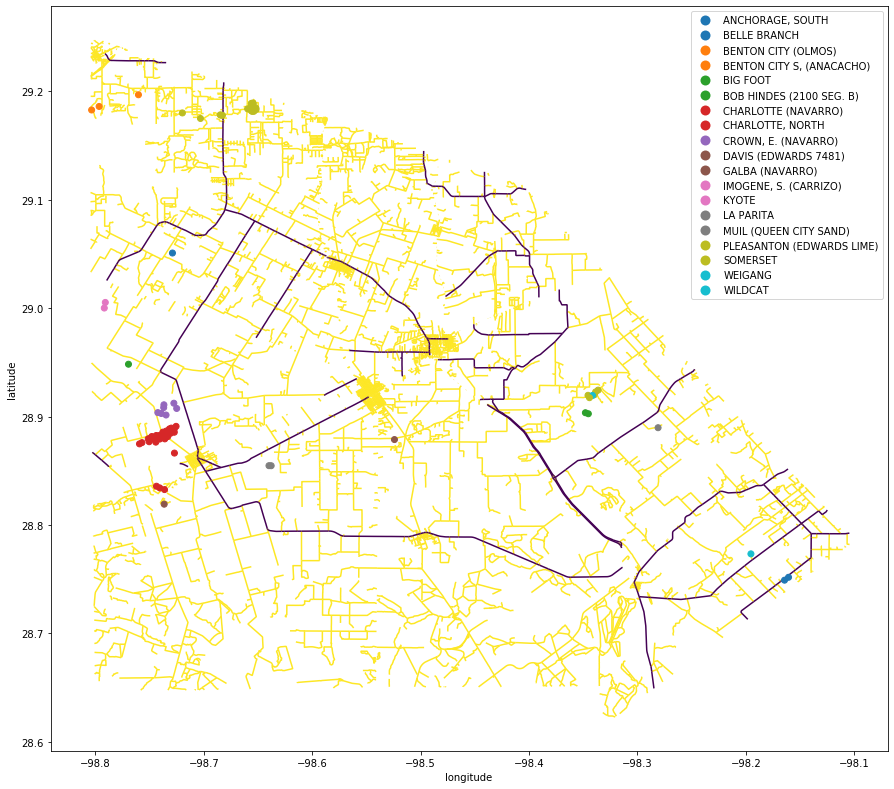

In [11]:
ax = basemap.plot(column='DISP_CODE', figsize=(15,15), zorder=0)
spatial.plot(column='FIELD_NAME', legend=True, ax=ax, zorder=1)

plt.xlabel('longitude')
plt.ylabel('latitude')

# Questions

* Can we optimize the sequence in which we plug and abandon the wells?
* Does it matter where we start in the state?
* Does well TD matter? Should we plug shallow wells first or deep wells first, or does that even matter? Need to find TD data from TXRRC